In [1]:
! pip install basic_image_eda
from basic_image_eda import BasicImageEDA


found 228 images.
Using 24 threads. (max:24)



100%|██████████| 228/228 [00:00<00:00, 1677.10it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  228

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  224
max height                               |  224
mean height                              |  224.0
median height                            |  224

min width                                |  224
max width                                |  224
mean width                               |  224.0
median width                             |  224

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [224 224] (h x w, multiples of 8)
recommended input size(by mean)          |  [224 224] (h x w, multiples of 16)
recommended input size(by mean)          |  [224 224] (h x w, multi

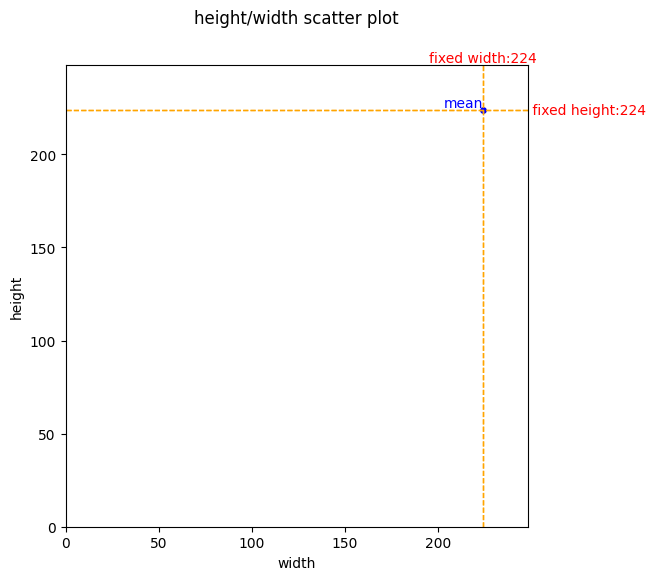

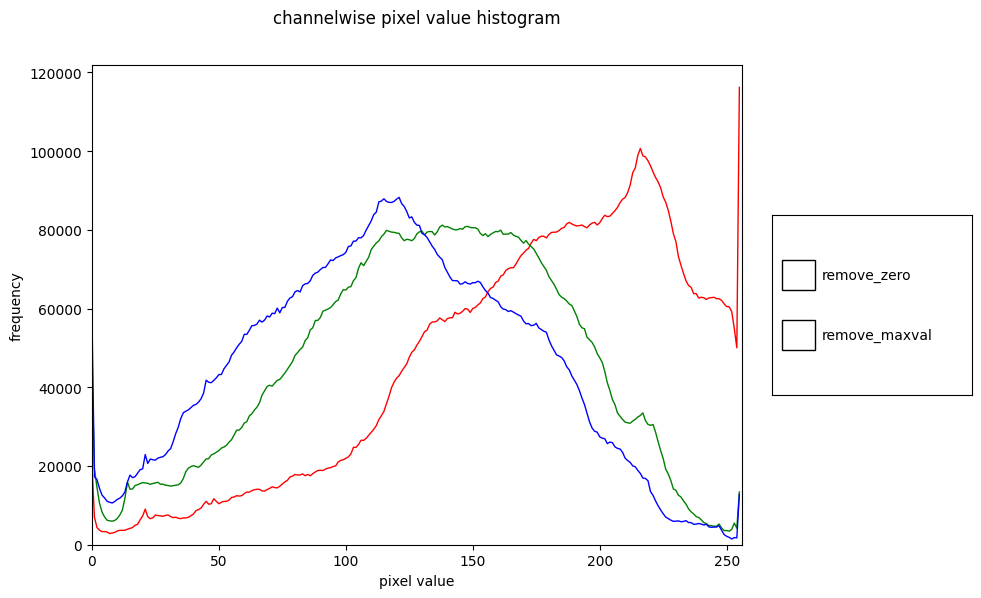

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['jpg'],
 'min_h': 224,
 'max_h': 224,
 'mean_h': 224.0,
 'median_h': 224,
 'min_w': 224,
 'max_w': 224,
 'mean_w': 224.0,
 'median_w': 224,
 'mean_hw_ratio': 1.0,
 'median_hw_ratio': 1.0,
 'rec_hw_size_8': array([224, 224]),
 'rec_hw_size_16': array([224, 224]),
 'rec_hw_size_32': array([224, 224]),
 'mean': array([0.68467325, 0.52151334, 0.4602454 ], dtype=float32),
 'std': array([0.21128598, 0.20470823, 0.20513868], dtype=float32)}

In [2]:
data_dir = "/usr/sci/scratch/Moksha/CS6190_project/OriginalImages/OriginalImages/Total_Data/"
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import numpy as np

In [37]:
model_name = "resnet50"
runningType = "GenericAug"
scratchDir = './Results'
file_path = f"{scratchDir}/training_log_{model_name}_{runningType}.txt"

In [38]:
def get_data(file_path):
    f = open(file_path, "r")
    lines = f.readlines()
    train_loss, val_loss, correct_cm, pred_cm = [], [], [], []
    for line in lines:
        data = line.strip().split("\t")
        print(data)
        if len(data) == 3:
            if not (data[0] == "Epoch"):
                train_loss.append(float(data[1]))
                val_loss.append(float(data[2]))
        elif len(data) == 2:
            if  not (data[0] == "pred"):
                print(type(data[0]))
                correct_cm.append(float(data[1]))
                pred_cm.append(0.0 if float(data[0]) <= 0.5 else 1.0)
    return  train_loss, val_loss, correct_cm, pred_cm


In [39]:
train_loss_arr, val_loss_arr, orig, pred = get_data(file_path)

['Epoch', 'train_loss', 'val_loss']
['1', '0.8106979988515377', '0.7737719863653183']
['2', '0.6911672577261925', '0.6246602684259415']
['3', '0.6650979984551668', '0.7382787317037582']
['4', '0.6461769267916679', '0.5657829940319061']
['5', '0.5477575697004795', '0.5506816431879997']
['6', '0.5643996372818947', '0.521944984793663']
['7', '0.5051556006073952', '0.5058222487568855']
['8', '0.4821958336979151', '0.5173617005348206']
['9', '0.5177164934575558', '0.4987706020474434']
['10', '0.47473148815333843', '0.48624883592128754']
['11', '0.49721984937787056', '0.47360747307538986']
['12', '0.49266087263822556', '0.526145838201046']
['13', '0.5241495352238417', '0.5909697972238064']
['14', '0.5819702409207821', '0.5277451127767563']
['15', '0.48453053552657366', '0.42637425288558006']
['16', '0.4354689382016659', '0.49395377933979034']
['17', '0.46833499427884817', '0.5092803202569485']
['18', '0.4079109262675047', '0.4707095995545387']
['19', '0.4697878183797002', '0.4846899509429931

In [40]:
orig, pred

([1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0])

[[18  4]
 [ 5 12]]


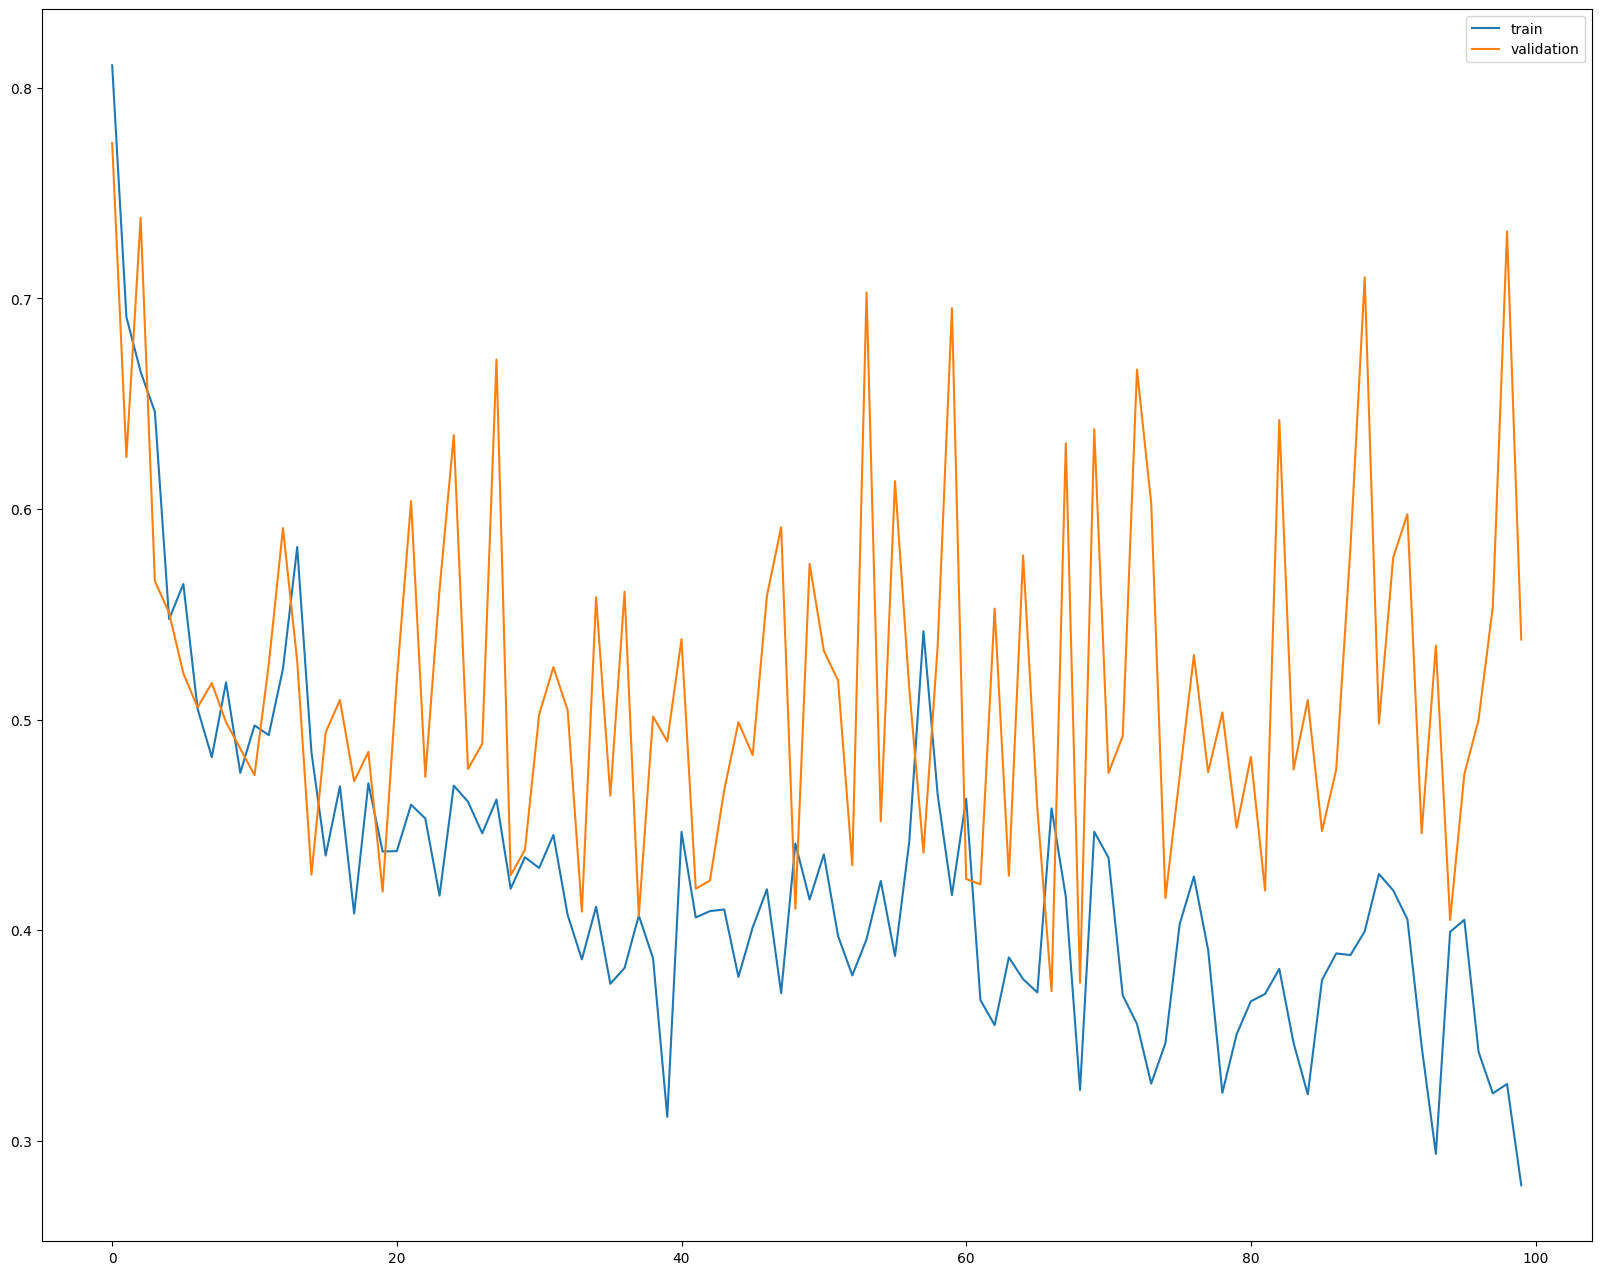

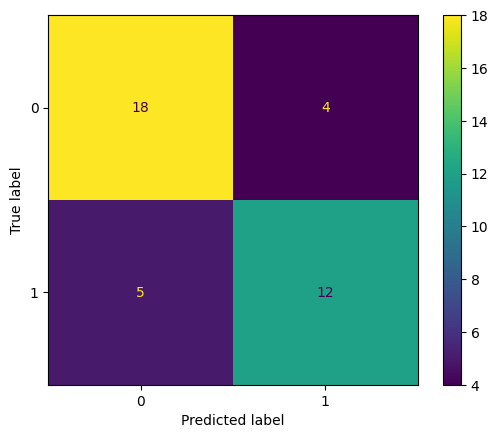

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20,16)
ax.plot(train_loss_arr, label="train")
ax.plot(val_loss_arr, label="validation")
ax.legend()
fig.savefig(os.path.join(scratchDir,"train_val_loss_"+model_name+"_"+runningType+".png"),transparent=True,bbox_inches='tight') 

cm = confusion_matrix(np.array(orig), np.array(pred))
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig(os.path.join(scratchDir,"confusion_matrix_"+model_name+"_"+runningType+".png"),transparent=True,bbox_inches='tight')   